# Invitae Cohort Analysis

By Jackie Petersen

---

In [1320]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

In [1321]:
# reading in the data
orders = pd.read_csv('orders.csv')
customers = pd.read_csv('customers.csv')

### Exploring the data

In [1322]:
orders.head()

,id,order_number,user_id,created
0,1709,36,344,2014-10-28 00:20:01
1,1406,7,608,2014-10-14 23:44:53
2,1716,6,2296,2014-10-28 17:47:07
3,1426,2,1225,2014-10-15 18:33:38
4,1415,6,797,2014-10-15 02:07:16


In [1323]:
customers.head()

,id,created
0,35410,2015-07-03 22:01:11
1,35417,2015-07-03 22:11:23
2,35412,2015-07-03 22:02:52
3,35413,2015-07-03 22:05:02
4,35424,2015-07-03 22:21:55


In [1324]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27575 entries, 0 to 27574
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27575 non-null  int64 
 1   order_number  27575 non-null  int64 
 2   user_id       27575 non-null  int64 
 3   created       27575 non-null  object
dtypes: int64(3), object(1)
memory usage: 861.8+ KB


In [1325]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25716 entries, 0 to 25715
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       25716 non-null  int64 
 1   created  25716 non-null  object
dtypes: int64(1), object(1)
memory usage: 401.9+ KB


> There are no NaN's in the data.

In [1326]:
orders.sort_values(by='user_id')

,id,order_number,user_id,created
26209,1,0,2,2014-05-16 00:13:50
25480,4,0,3,2014-05-21 20:40:05
26055,7,0,3,2014-05-21 23:00:14
26211,3,0,3,2014-05-21 20:39:23
26212,8,0,3,2014-05-22 20:51:22
...,...,...,...,...
21551,28730,1,35964,2015-07-08 02:05:56
21507,28743,1,35976,2015-07-08 03:04:46
21588,28752,1,35977,2015-07-08 03:37:49
21638,28805,1,35990,2015-07-08 15:40:00


In [1327]:
len(orders['user_id'].unique())

7067

In [1328]:
len(orders['id'].unique())

27575

> In the orders dataset, the `'id'` column contains all unique values, where the `'user_id'` has duplicate values, perhaps for multiple orders from the same customers.

In [1329]:
customers.sort_values(by='id')

,id,created
1281,9483,2015-01-01 00:26:59
1072,9484,2015-01-01 00:51:40
1073,9485,2015-01-01 01:13:18
1074,9486,2015-01-01 01:57:02
1075,9487,2015-01-01 02:22:41
...,...,...
491,35948,2015-07-07 23:20:54
531,35949,2015-07-07 23:23:04
434,35950,2015-07-07 23:25:42
444,35951,2015-07-07 23:29:58


In [1330]:
len(customers['id'].unique())

25716

> The `'id'` column in the customers dataset has all unique values.

### Renaming the columns to differentiate before combining

In [1331]:
orders.rename(columns={'id':'orders_id', 'created':'order_created'}, inplace=True)
orders.head()

,orders_id,order_number,user_id,order_created
0,1709,36,344,2014-10-28 00:20:01
1,1406,7,608,2014-10-14 23:44:53
2,1716,6,2296,2014-10-28 17:47:07
3,1426,2,1225,2014-10-15 18:33:38
4,1415,6,797,2014-10-15 02:07:16


In [1332]:
customers.rename(columns={'id':'user_id', 'created':'customer_created'}, inplace=True)
customers.head()

,user_id,customer_created
0,35410,2015-07-03 22:01:11
1,35417,2015-07-03 22:11:23
2,35412,2015-07-03 22:02:52
3,35413,2015-07-03 22:05:02
4,35424,2015-07-03 22:21:55


### Combining the two datasets

> On the `'user_id'` column from the orders dataset and the `'id'` column on the customers dataset, now renamed `'user_id'`.

In [1333]:
df_combined = orders.merge(customers, on='user_id')
df_combined

,orders_id,order_number,user_id,order_created,customer_created
0,8256,2,12654,2015-02-17 20:03:27,2015-01-20 02:45:51
1,12711,5,12654,2015-03-24 02:03:44,2015-01-20 02:45:51
2,11763,4,12654,2015-03-16 23:00:46,2015-01-20 02:45:51
3,21112,6,12654,2015-05-25 18:13:47,2015-01-20 02:45:51
4,22186,7,12654,2015-06-01 22:41:03,2015-01-20 02:45:51
...,...,...,...,...,...
17010,5214,1,11828,2015-01-19 01:17:24,2015-01-14 04:06:27
17011,5190,1,11209,2015-01-18 23:46:18,2015-01-11 18:14:36
17012,7689,1,13496,2015-02-11 03:44:58,2015-01-24 02:55:06
17013,7640,1,14980,2015-02-11 00:47:08,2015-02-08 20:18:50


In [1334]:
len(df_combined['user_id'].unique())

5356

> There are 5356 unique customers now in the combined dataset.

In [1335]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17015 entries, 0 to 17014
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   orders_id         17015 non-null  int64 
 1   order_number      17015 non-null  int64 
 2   user_id           17015 non-null  int64 
 3   order_created     17015 non-null  object
 4   customer_created  17015 non-null  object
dtypes: int64(3), object(2)
memory usage: 797.6+ KB


### Converting the `'order_created'` and `'customer_created'` columns to datetime format

In [1336]:
df_combined['order_created'] = pd.to_datetime(df_combined['order_created'])
df_combined['customer_created'] = pd.to_datetime(df_combined['customer_created'])

In [1337]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17015 entries, 0 to 17014
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   orders_id         17015 non-null  int64         
 1   order_number      17015 non-null  int64         
 2   user_id           17015 non-null  int64         
 3   order_created     17015 non-null  datetime64[ns]
 4   customer_created  17015 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 797.6 KB


### Converting the UTC timezone to US/Eastern

In [1338]:
df_combined['order_created'] = df_combined['order_created'].dt.tz_localize(tz='UTC').dt.tz_convert(tz='US/Eastern')
df_combined['customer_created'] = df_combined['customer_created'].dt.tz_localize(tz='UTC').dt.tz_convert(tz='US/Eastern')

In [1339]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17015 entries, 0 to 17014
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype                     
---  ------            --------------  -----                     
 0   orders_id         17015 non-null  int64                     
 1   order_number      17015 non-null  int64                     
 2   user_id           17015 non-null  int64                     
 3   order_created     17015 non-null  datetime64[ns, US/Eastern]
 4   customer_created  17015 non-null  datetime64[ns, US/Eastern]
dtypes: datetime64[ns, US/Eastern](2), int64(3)
memory usage: 797.6 KB


In [1340]:
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created
0,8256,2,12654,2015-02-17 15:03:27-05:00,2015-01-19 21:45:51-05:00
1,12711,5,12654,2015-03-23 22:03:44-04:00,2015-01-19 21:45:51-05:00
2,11763,4,12654,2015-03-16 19:00:46-04:00,2015-01-19 21:45:51-05:00
3,21112,6,12654,2015-05-25 14:13:47-04:00,2015-01-19 21:45:51-05:00
4,22186,7,12654,2015-06-01 18:41:03-04:00,2015-01-19 21:45:51-05:00


### Stripping the extra timezone info off the end of the datetime columns, then converting back to datetime format

In [1341]:
df_combined['order_created'] = df_combined['order_created'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_combined['customer_created'] = df_combined['customer_created'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_combined['order_created'] = pd.to_datetime(df_combined['order_created'])
df_combined['customer_created'] = pd.to_datetime(df_combined['customer_created'])

In [1342]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17015 entries, 0 to 17014
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   orders_id         17015 non-null  int64         
 1   order_number      17015 non-null  int64         
 2   user_id           17015 non-null  int64         
 3   order_created     17015 non-null  datetime64[ns]
 4   customer_created  17015 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 797.6 KB


In [1343]:
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created
0,8256,2,12654,2015-02-17 15:03:27,2015-01-19 21:45:51
1,12711,5,12654,2015-03-23 22:03:44,2015-01-19 21:45:51
2,11763,4,12654,2015-03-16 19:00:46,2015-01-19 21:45:51
3,21112,6,12654,2015-05-25 14:13:47,2015-01-19 21:45:51
4,22186,7,12654,2015-06-01 18:41:03,2015-01-19 21:45:51


### Creating a column with the difference in days of the customer creation and the order creation

In [1344]:
df_combined['time_difference'] = df_combined['order_created'] - df_combined['customer_created']
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created,time_difference
0,8256,2,12654,2015-02-17 15:03:27,2015-01-19 21:45:51,28 days 17:17:36
1,12711,5,12654,2015-03-23 22:03:44,2015-01-19 21:45:51,63 days 00:17:53
2,11763,4,12654,2015-03-16 19:00:46,2015-01-19 21:45:51,55 days 21:14:55
3,21112,6,12654,2015-05-25 14:13:47,2015-01-19 21:45:51,125 days 16:27:56
4,22186,7,12654,2015-06-01 18:41:03,2015-01-19 21:45:51,132 days 20:55:12


In [1345]:
df_combined['time_difference'] = df_combined['time_difference'].dt.days
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created,time_difference
0,8256,2,12654,2015-02-17 15:03:27,2015-01-19 21:45:51,28
1,12711,5,12654,2015-03-23 22:03:44,2015-01-19 21:45:51,63
2,11763,4,12654,2015-03-16 19:00:46,2015-01-19 21:45:51,55
3,21112,6,12654,2015-05-25 14:13:47,2015-01-19 21:45:51,125
4,22186,7,12654,2015-06-01 18:41:03,2015-01-19 21:45:51,132


### Stripping the timestamp from the `'order_created'` and `'customer_created'` columns and adding columns with the week number for both

In [1346]:
df_combined['order_week'] = df_combined['order_created'].dt.isocalendar()['week']
df_combined['customer_week'] = df_combined['customer_created'].dt.isocalendar()['week']
df_combined['order_created'] = df_combined['order_created'].dt.date
df_combined['customer_created'] = df_combined['customer_created'].dt.date
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created,time_difference,order_week,customer_week
0,8256,2,12654,2015-02-17,2015-01-19,28,8,4
1,12711,5,12654,2015-03-23,2015-01-19,63,13,4
2,11763,4,12654,2015-03-16,2015-01-19,55,12,4
3,21112,6,12654,2015-05-25,2015-01-19,125,22,4
4,22186,7,12654,2015-06-01,2015-01-19,132,23,4


In [1347]:
df_combined['weekly_difference'] = df_combined['order_week'] - df_combined['customer_week']
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created,time_difference,order_week,customer_week,weekly_difference
0,8256,2,12654,2015-02-17,2015-01-19,28,8,4,4
1,12711,5,12654,2015-03-23,2015-01-19,63,13,4,9
2,11763,4,12654,2015-03-16,2015-01-19,55,12,4,8
3,21112,6,12654,2015-05-25,2015-01-19,125,22,4,18
4,22186,7,12654,2015-06-01,2015-01-19,132,23,4,19


In [1348]:
df_combined.groupby('user_id')['order_created'].transform('min')

0        2015-01-19
1        2015-01-19
2        2015-01-19
3        2015-01-19
4        2015-01-19
            ...    
17010    2015-01-18
17011    2015-01-18
17012    2015-02-10
17013    2015-02-10
17014    2015-02-17
Name: order_created, Length: 17015, dtype: object

### Creating column for `'cohort'`

In [1349]:
# adapted from https://stackoverflow.com/questions/67697602/convert-week-number-in-dataframe-to-start-date-of-week-monday
# & http://mvsourcecode.com/python-how-to-get-date-range-from-week-number-mvsourcecode/

# creating the first date for the week & fixing format
firstdateofweek = pd.to_datetime(
    '2015' + df_combined['customer_week'].astype(str) + "1",
    format='%G%V%w')

# creating the last day of the week using the first day & fixing format
lastdayofweek = (pd.to_datetime(
    '2015' + df_combined['customer_week'].astype(str) + "1",
    format='%G%V%w')) + datetime.timedelta(days=6.9)
lastdayofweek = lastdayofweek.dt.strftime('%Y-%m-%d')

# creating the final cohort column combining these two dates
df_combined['cohort'] = firstdateofweek.astype(str) + ' - ' + lastdayofweek.astype(str)

In [1350]:
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created,time_difference,order_week,customer_week,weekly_difference,cohort
0,8256,2,12654,2015-02-17,2015-01-19,28,8,4,4,2015-01-19 - 2015-01-25
1,12711,5,12654,2015-03-23,2015-01-19,63,13,4,9,2015-01-19 - 2015-01-25
2,11763,4,12654,2015-03-16,2015-01-19,55,12,4,8,2015-01-19 - 2015-01-25
3,21112,6,12654,2015-05-25,2015-01-19,125,22,4,18,2015-01-19 - 2015-01-25
4,22186,7,12654,2015-06-01,2015-01-19,132,23,4,19,2015-01-19 - 2015-01-25


### Converting the `'time_difference'` column from days to groupings of multiples of 7

In [1351]:
# checking to see what the biggest number day there is in the dataset

df_combined['time_difference'].sort_values().tail()

9411    180
124     180
7646    181
27      183
7647    186
Name: time_difference, dtype: int64

### Converting the `'time_difference'` to buckets

In [1352]:
df_combined['time_dif_buckets'] = pd.cut(df_combined['time_difference'], 
                                bins=np.arange(0,190,7), right=False, include_lowest=True)

In [1353]:
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created,time_difference,order_week,customer_week,weekly_difference,cohort,time_dif_buckets
0,8256,2,12654,2015-02-17,2015-01-19,28,8,4,4,2015-01-19 - 2015-01-25,"[28, 35)"
1,12711,5,12654,2015-03-23,2015-01-19,63,13,4,9,2015-01-19 - 2015-01-25,"[63, 70)"
2,11763,4,12654,2015-03-16,2015-01-19,55,12,4,8,2015-01-19 - 2015-01-25,"[49, 56)"
3,21112,6,12654,2015-05-25,2015-01-19,125,22,4,18,2015-01-19 - 2015-01-25,"[119, 126)"
4,22186,7,12654,2015-06-01,2015-01-19,132,23,4,19,2015-01-19 - 2015-01-25,"[126, 133)"


### Getting the distinct customers from each bucket

In [1354]:
# the customers column is the # of distinct customers for each bucket

df_2 = df_combined.groupby(['cohort', 'time_dif_buckets']).agg(customers=('user_id', 'nunique')).reset_index(drop=False)
df_2.head()

,cohort,time_dif_buckets,customers
0,2014-12-29 - 2015-01-04,"[0, 7)",21
1,2014-12-29 - 2015-01-04,"[7, 14)",12
2,2014-12-29 - 2015-01-04,"[14, 21)",9
3,2014-12-29 - 2015-01-04,"[21, 28)",7
4,2014-12-29 - 2015-01-04,"[28, 35)",10


In [1397]:
df_2_pivot = df_2.pivot_table(index='cohort', columns='time_dif_buckets', values='customers')

# adding a column for the total number of customers per cohort
df_2_pivot['customers_total'] = df_2.groupby('cohort').sum('customers')

# moving that column to the first column
df_2_pivot.insert(0, 'customers_total', df_2_pivot.pop('customers_total'))

df_2_pivot

time_dif_buckets,customers_total,"[0, 7)","[7, 14)","[14, 21)","[21, 28)","[28, 35)","[35, 42)","[42, 49)","[49, 56)","[56, 63)",...,"[119, 126)","[126, 133)","[133, 140)","[140, 147)","[147, 154)","[154, 161)","[161, 168)","[168, 175)","[175, 182)","[182, 189)"
cohort,,,,,,,,,,,,,,,,,,,,,
2014-12-29 - 2015-01-04,160,21,12,9,7,10,6,5,6,7,...,6,8,3,3,4,2,4,5,3,2
2015-01-05 - 2015-01-11,1471,147,105,66,73,69,53,61,71,61,...,47,38,44,36,40,49,54,36,28,0
2015-01-12 - 2015-01-18,1439,194,94,77,54,54,65,68,57,66,...,50,44,46,38,51,40,36,30,2,0
2015-01-19 - 2015-01-25,1469,211,97,55,64,61,74,66,61,56,...,44,48,56,50,34,34,28,1,0,0
2015-01-26 - 2015-02-01,848,133,43,45,29,47,32,37,37,31,...,30,26,31,25,31,26,0,0,0,0
2015-02-02 - 2015-02-08,499,88,33,27,24,25,19,24,12,19,...,15,19,14,17,12,0,0,0,0,0
2015-02-09 - 2015-02-15,439,79,25,33,22,20,18,18,18,18,...,12,17,17,9,2,0,0,0,0,0
2015-02-16 - 2015-02-22,424,75,32,22,30,21,15,15,20,16,...,13,20,12,1,0,0,0,0,0,0
2015-02-23 - 2015-03-01,793,130,55,51,35,47,41,35,41,37,...,38,14,6,0,0,0,0,0,0,0


In [1429]:
# getting a percentage of the customers ordering per bucket
df_2_percentages = df_2_pivot.divide(df_2_pivot['customers_total'], axis=0)*100
df_2_percentages.head()

time_dif_buckets,customers_total,"[0, 7)","[7, 14)","[14, 21)","[21, 28)","[28, 35)","[35, 42)","[42, 49)","[49, 56)","[56, 63)",...,"[119, 126)","[126, 133)","[133, 140)","[140, 147)","[147, 154)","[154, 161)","[161, 168)","[168, 175)","[175, 182)","[182, 189)"
cohort,,,,,,,,,,,,,,,,,,,,,
2014-12-29 - 2015-01-04,100.0,13.125000,7.500000,5.625000,4.375000,6.250000,3.750000,3.125000,3.750000,4.375000,...,3.750000,5.000000,1.875000,1.875000,2.500000,1.250000,2.500000,3.125000,1.875000,1.25
2015-01-05 - 2015-01-11,100.0,9.993202,7.138001,4.486744,4.962610,4.690687,3.602991,4.146839,4.826649,4.146839,...,3.195105,2.583277,2.991162,2.447315,2.719239,3.331067,3.670972,2.447315,1.903467,0.00
2015-01-12 - 2015-01-18,100.0,13.481584,6.532314,5.350938,3.752606,3.752606,4.517026,4.725504,3.961084,4.586518,...,3.474635,3.057679,3.196664,2.640723,3.544128,2.779708,2.501737,2.084781,0.138985,0.00
2015-01-19 - 2015-01-25,100.0,14.363513,6.603131,3.744044,4.356705,4.152485,5.037440,4.492852,4.152485,3.812117,...,2.995235,3.267529,3.812117,3.403676,2.314500,2.314500,1.906059,0.068074,0.000000,0.00
2015-01-26 - 2015-02-01,100.0,15.683962,5.070755,5.306604,3.419811,5.542453,3.773585,4.363208,4.363208,3.655660,...,3.537736,3.066038,3.655660,2.948113,3.655660,3.066038,0.000000,0.000000,0.000000,0.00


### Heatmap depicting the customer orders by cohort

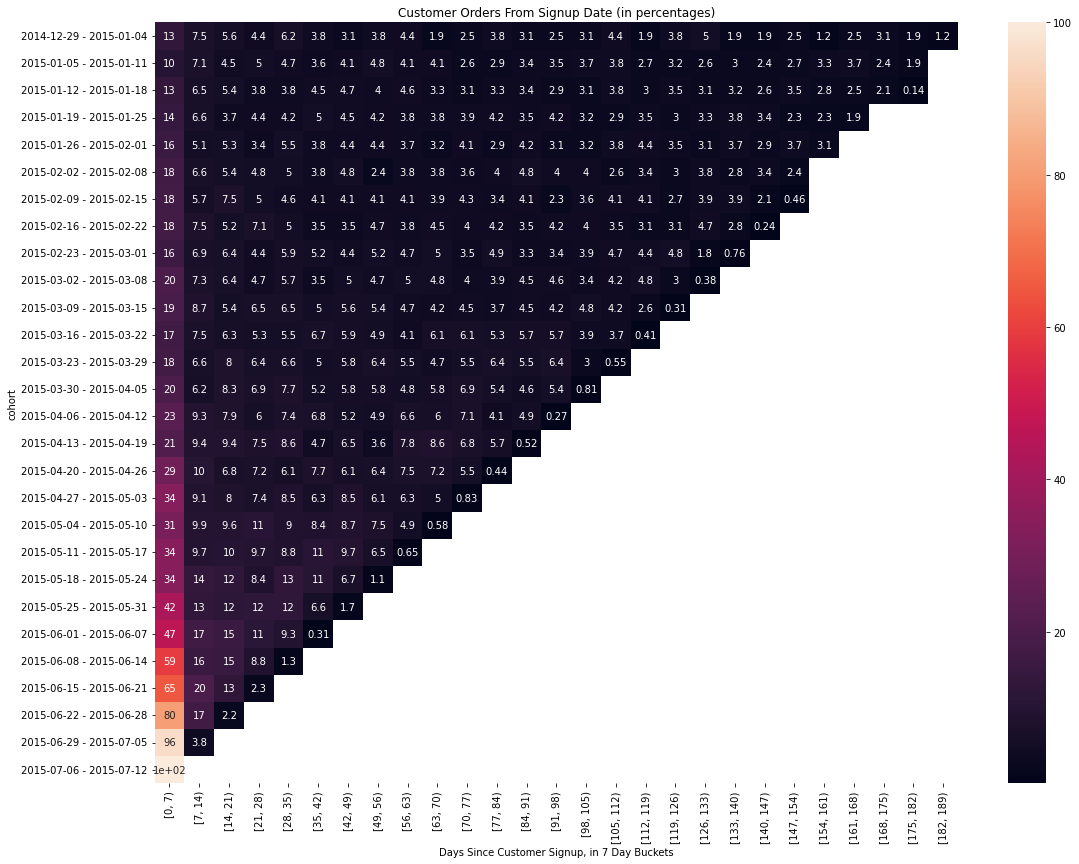

In [1428]:
plt.figure(figsize=(18,14))
plt.title('Customer Orders From Signup Date (in percentages)')
sns.heatmap(df_2_percentages.drop(columns='customers_total'), annot=True, vmin=0.1, vmax=100, 
            mask=df_2_percentages.drop(columns='customers_total') < 0.1)
plt.xlabel('Days Since Customer Signup, in 7 Day Buckets');

> The above heatmap is showing the percentage of customer orders from their signup date in percentages. For example, for the week of 2015-06-22 - 2015-06-28, 80% of customers ordered within their first week of signup (0-6 days after), 17% ordered within their second week after signup (7-13 days after), and 2.2% ordered in their third week after signup (14-20 days after).